In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import math
import sklearn
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import warnings

In [2]:
print("numpy",np.__version__)
print('pandas',pd.__version__)
print('joblib',joblib.__version__)


numpy 1.26.4
pandas 2.2.2
joblib 1.4.2


In [4]:
df_cr=pd.read_csv('credit_record.csv')
df_cr

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
df_ar=pd.read_csv('application_record.csv')
df_ar.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
df_cr.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [9]:
months =pd.DataFrame(df_cr.groupby(['ID'])['MONTHS_BALANCE'].agg(min))

/var/folders/sz/0j8qkd414cbf6_yv7zr2wgb00000gn/T/ipykernel_23823/3794500342.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  months =pd.DataFrame(df_cr.groupby(['ID'])['MONTHS_BALANCE'].agg(min))


In [10]:
months=months.rename(columns={'MONTHS_BALANCE':'Account age'})

In [11]:
months

,Account age
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [12]:
df_ar=pd.merge(df_ar,months,how='left',on='ID')

In [13]:
df_ar

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN


In [14]:
df_cr['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [15]:
df_cr['due_count']=None

In [16]:
df_cr['due_count'][df_cr['STATUS']=='2']='Yes'
df_cr['due_count'][df_cr['STATUS']=='3']='Yes'
df_cr['due_count'][df_cr['STATUS']=='4']='Yes'
df_cr['due_count'][df_cr['STATUS']=='5']='Yes'

/var/folders/sz/0j8qkd414cbf6_yv7zr2wgb00000gn/T/ipykernel_23823/3233335393.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cr['due_count'][df_cr['STATUS']=='2']='Yes'
/var/folders/sz/0j8qkd414cbf6_yv7zr2wgb00000gn/T/ipykernel_23823/3

In [17]:
df_cr.due_count.unique()

array([None, 'Yes'], dtype=object)

In [18]:
cp=df_cr.groupby('ID').count()

In [19]:
cp.due_count.unique()

array([ 0,  5,  1,  2,  3, 33,  6,  9,  7, 15, 20, 11,  4, 13, 22, 38, 14,
       12,  8, 10, 18, 39, 17, 40, 27, 21, 16, 48, 26, 19, 24, 31, 45, 43,
       47, 23, 35])

In [20]:
cp

,MONTHS_BALANCE,STATUS,due_count
ID,,,
5001711,4,4,0
5001712,19,19,0
5001713,22,22,0
5001714,15,15,0
5001715,60,60,0
...,...,...,...
5150482,18,18,0
5150483,18,18,0
5150484,13,13,0


In [21]:
def due(duecount):
    if duecount==0:
        return 'No'
    else:
        return 'Yes'

In [22]:
cp['due_count']=cp['due_count'].apply(due)

In [23]:
cp.due_count.value_counts()

due_count
No     45318
Yes      667
Name: count, dtype: int64

In [24]:
cp.drop(columns=['MONTHS_BALANCE','STATUS'], inplace=True)

In [25]:
cp

,due_count
ID,
5001711,No
5001712,No
5001713,No
5001714,No
5001715,No
...,...
5150482,No
5150483,No
5150484,No


In [26]:
df_ar=pd.merge(df_ar,cp,how='inner',on='ID')

In [27]:
df_ar

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account age,due_count
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,-11.0,Yes
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-23.0,Yes
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-32.0,Yes
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,-9.0,Yes


In [28]:
def risk(value):
    if value=='Yes':
        return 1
    else:
        return 0

In [29]:
df_ar['is high risk']=None

In [30]:
df_ar['is high risk']=df_ar['due_count'].apply(risk)

In [31]:
df_ar

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account age,due_count,is high risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-11.0,Yes,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-23.0,Yes,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-32.0,Yes,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,-9.0,Yes,1


In [32]:
df_ar.drop('due_count',axis=1,inplace=True)

In [33]:
df_ar

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account age,is high risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,-11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,-9.0,1


In [34]:
df_ar=df_ar.rename(columns={
    'CODE_GENDER':'Gender',
    'FLAG_OWN_CAR':'Has_a_car',
    'FLAG_OWN_REALTY':'Has_a_property',
    'CNT_CHILDREN':'Children count',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_INCOME_TYPE':'Employment_status',
    'NAME_EDUCATION_TYPE':'Education_level',
    'NAME_FAMILY_STATUS':'Marital_status',
    'NAME_HOUSING_TYPE':'Dwelling',
    'DAYS_BIRTH':'Age',
    'DAYS_EMPLOYED': 'Employment_length',
    'FLAG_MOBIL': 'Has a mobile phone',
    'FLAG_WORK_PHONE': 'Has a work phone',
    'FLAG_PHONE': 'Has a phone',
    'FLAG_EMAIL': 'Has an email',
    'OCCUPATION_TYPE': 'Job title',
    'CNT_FAM_MEMBERS': 'Family_member_count',
    'Account age': 'Account age'
    
})

In [35]:
df_ar

,ID,Gender,Has_a_car,Has_a_property,Children count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family_member_count,Account age,is high risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,-11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,-9.0,1


In [36]:
df_ar.drop("ID",axis=1,inplace=True)

In [37]:
df_ar.head()

,Gender,Has_a_car,Has_a_property,Children count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family_member_count,Account age,is high risk
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [38]:
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               36457 non-null  object 
 1   Has_a_car            36457 non-null  object 
 2   Has_a_property       36457 non-null  object 
 3   Children count       36457 non-null  int64  
 4   Income               36457 non-null  float64
 5   Employment_status    36457 non-null  object 
 6   Education_level      36457 non-null  object 
 7   Marital_status       36457 non-null  object 
 8   Dwelling             36457 non-null  object 
 9   Age                  36457 non-null  int64  
 10  Employment_length    36457 non-null  int64  
 11  Has a mobile phone   36457 non-null  int64  
 12  Has a work phone     36457 non-null  int64  
 13  Has a phone          36457 non-null  int64  
 14  Has an email         36457 non-null  int64  
 15  Job title            25134 non-null 

In [39]:
df_ar['Gender'].value_counts()

Gender
F    24430
M    12027
Name: count, dtype: int64

In [40]:
df_ar['Has_a_car'].value_counts()

Has_a_car
N    22614
Y    13843
Name: count, dtype: int64

In [41]:
df_ar['Has_a_property'].value_counts()

Has_a_property
Y    24506
N    11951
Name: count, dtype: int64

In [42]:
df_ar.describe()

,Children count,Income,Age,Employment_length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family_member_count,Account age,is high risk
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [43]:
df_ar.isnull().sum()

Gender                     0
Has_a_car                  0
Has_a_property             0
Children count             0
Income                     0
Employment_status          0
Education_level            0
Marital_status             0
Dwelling                   0
Age                        0
Employment_length          0
Has a mobile phone         0
Has a work phone           0
Has a phone                0
Has an email               0
Job title              11323
Family_member_count        0
Account age                0
is high risk               0
dtype: int64

In [44]:
df_ar.drop('Job title', axis=1,inplace=True)

In [45]:
df_ar.drop(['Children count','Has a mobile phone','Has a work phone','Has an email','Has a phone'],axis=1,inplace=True)

In [46]:
df_ar.head()

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count,Account age,is high risk
0,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-15.0,0
1,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-14.0,0
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0,-29.0,0
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,-4.0,0
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,-26.0,0


In [47]:
df_ar.isnull().sum()

Gender                 0
Has_a_car              0
Has_a_property         0
Income                 0
Employment_status      0
Education_level        0
Marital_status         0
Dwelling               0
Age                    0
Employment_length      0
Family_member_count    0
Account age            0
is high risk           0
dtype: int64

In [48]:
df=deepcopy(df_ar)

In [49]:
df

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count,Account age,is high risk
0,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-15.0,0
1,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-14.0,0
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0,-29.0,0
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,-4.0,0
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,M,Y,Y,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,2.0,-11.0,1
36453,F,N,Y,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,2.0,-23.0,1
36454,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,2.0,-32.0,1
36455,F,N,Y,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,2.0,-9.0,1


Text(0.5, 1.0, 'Income BY Employment Status')

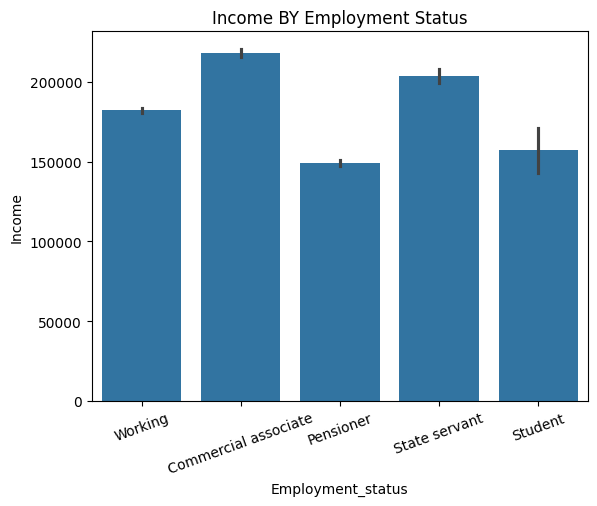

In [50]:
sns.barplot(x='Employment_status',y='Income',data=df)
plt.xticks(rotation=20)
plt.title('Income BY Employment Status')

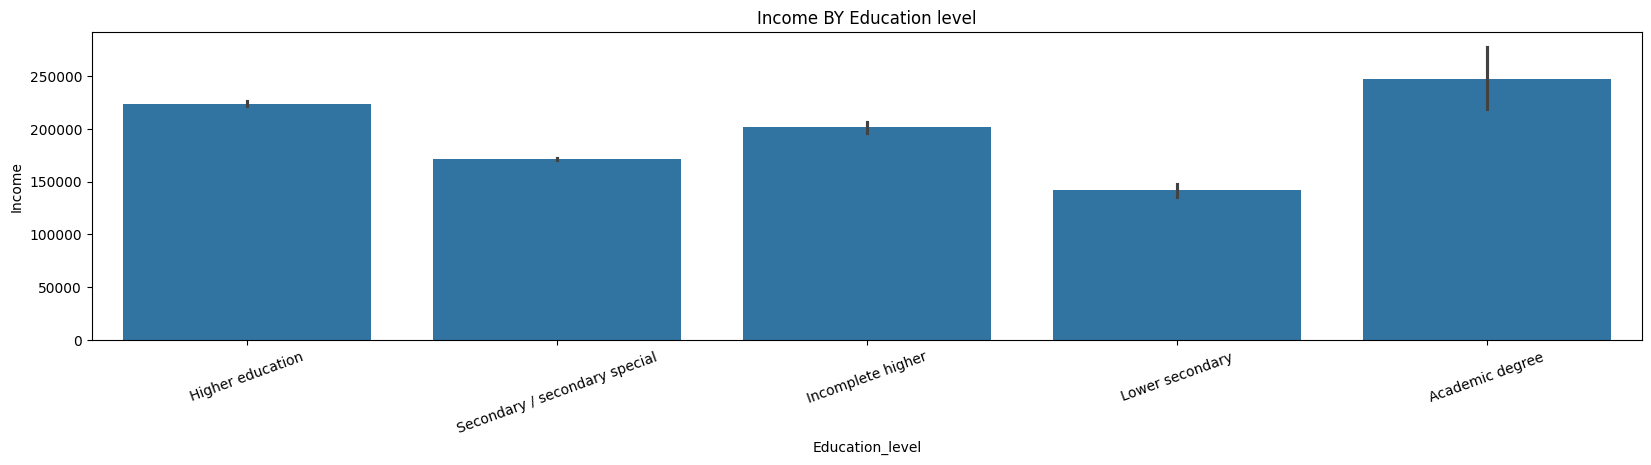

In [51]:
plt.figure(figsize=(20,4))
sns.barplot(x='Education_level',y='Income',data=df)
plt.xticks(rotation=20)
plt.title('Income BY Education level')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

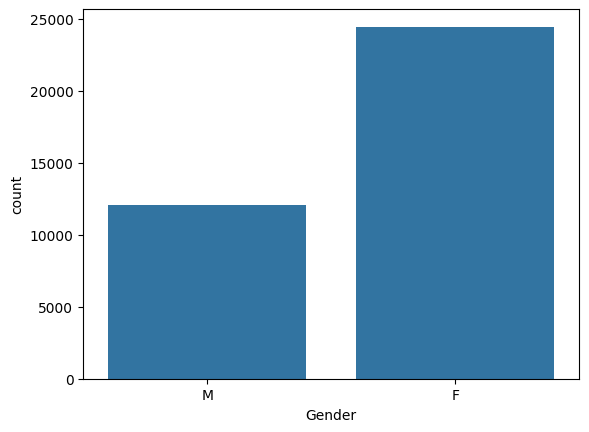

In [52]:
sns.countplot(x='Gender',data=df)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Higher education'),
  Text(1, 0, 'Secondary / secondary special'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

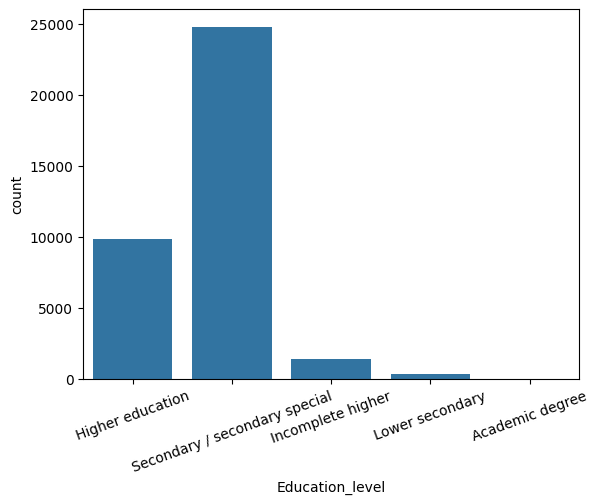

In [53]:
sns.countplot(x='Education_level',data=df)
plt.xticks(rotation=20)

In [54]:
df['Education_level'].value_counts()

Education_level
Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: count, dtype: int64

<Axes: xlabel='Has_a_car', ylabel='count'>

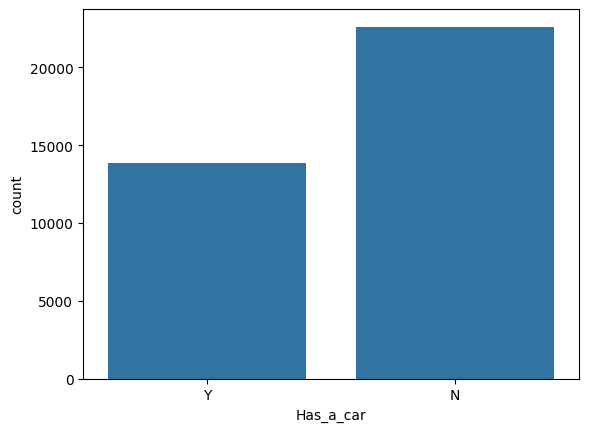

In [55]:
sns.countplot(x='Has_a_car',data=df)

<Axes: xlabel='Has_a_property', ylabel='count'>

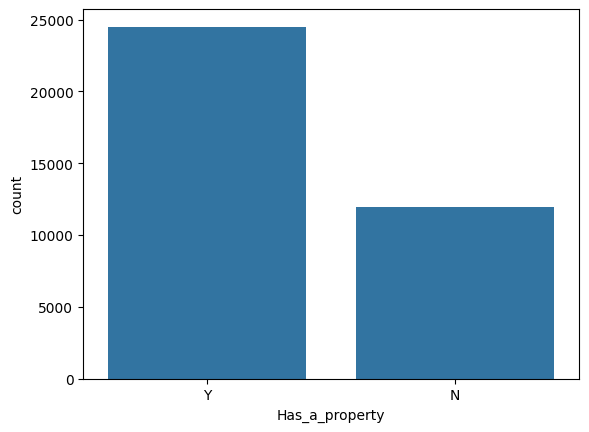

In [56]:
sns.countplot(x='Has_a_property',data=df)

In [57]:
#sns.countplot(x=df['Has_a_phone'])

In [58]:
df.columns

Index(['Gender', 'Has_a_car', 'Has_a_property', 'Income', 'Employment_status',
       'Education_level', 'Marital_status', 'Dwelling', 'Age',
       'Employment_length', 'Family_member_count', 'Account age',
       'is high risk'],
      dtype='object')

<Axes: xlabel='Family_member_count', ylabel='count'>

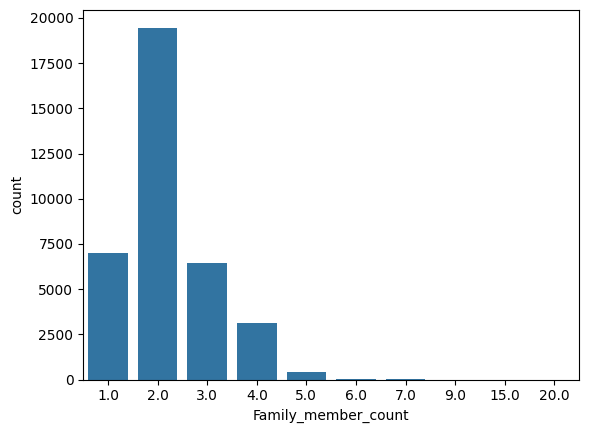

In [59]:
sns.countplot(x=df['Family_member_count'])

<Axes: xlabel='is high risk', ylabel='count'>

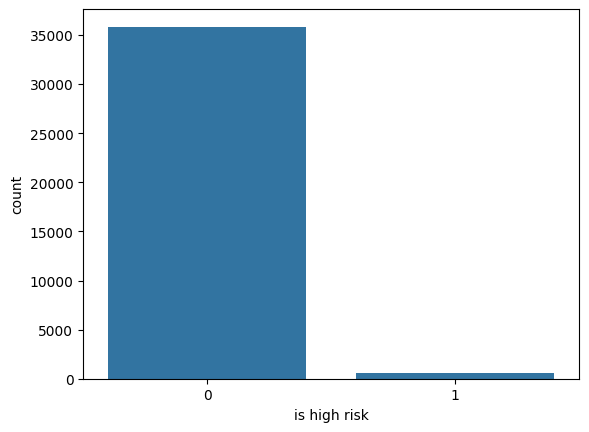

In [60]:
sns.countplot(x=df['is high risk'])

In [61]:
df

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count,Account age,is high risk
0,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-15.0,0
1,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-14.0,0
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0,-29.0,0
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,-4.0,0
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,M,Y,Y,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,2.0,-11.0,1
36453,F,N,Y,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,2.0,-23.0,1
36454,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,2.0,-32.0,1
36455,F,N,Y,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,2.0,-9.0,1


In [62]:
d=df['Education_level'].value_counts()

In [63]:
d.index


Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object', name='Education_level')

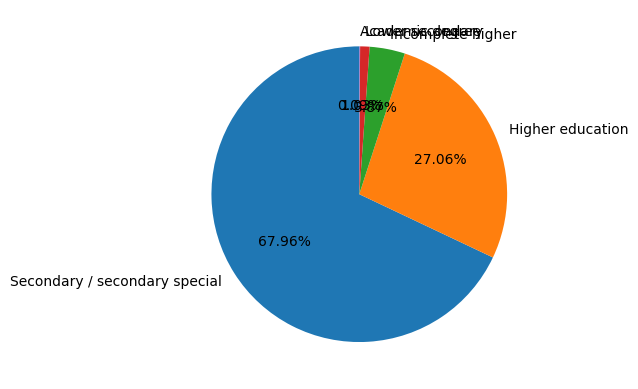

In [64]:

plt.pie(d, startangle=90, labels=d.index,autopct='%1.2f%%')


plt.show()

In [65]:
df.head()

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count,Account age,is high risk
0,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-15.0,0
1,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-14.0,0
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0,-29.0,0
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,-4.0,0
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,-26.0,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               36457 non-null  object 
 1   Has_a_car            36457 non-null  object 
 2   Has_a_property       36457 non-null  object 
 3   Income               36457 non-null  float64
 4   Employment_status    36457 non-null  object 
 5   Education_level      36457 non-null  object 
 6   Marital_status       36457 non-null  object 
 7   Dwelling             36457 non-null  object 
 8   Age                  36457 non-null  int64  
 9   Employment_length    36457 non-null  int64  
 10  Family_member_count  36457 non-null  float64
 11  Account age          36457 non-null  float64
 12  is high risk         36457 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 3.6+ MB


In [67]:
df.drop(columns=['Account age'],inplace=True)

In [68]:
df.head()

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count,is high risk
0,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,0
1,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,0
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0,0
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,0
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               36457 non-null  object 
 1   Has_a_car            36457 non-null  object 
 2   Has_a_property       36457 non-null  object 
 3   Income               36457 non-null  float64
 4   Employment_status    36457 non-null  object 
 5   Education_level      36457 non-null  object 
 6   Marital_status       36457 non-null  object 
 7   Dwelling             36457 non-null  object 
 8   Age                  36457 non-null  int64  
 9   Employment_length    36457 non-null  int64  
 10  Family_member_count  36457 non-null  float64
 11  is high risk         36457 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 3.3+ MB


In [70]:
df['Age']=np.abs(df['Age'])/365.25
df['Age']=df['Age'].apply(math.floor)

In [71]:
df_ret_idx = df['Employment_length'][df['Employment_length'] == 365243].index
df.loc[df_ret_idx,'Employment_length'] = 0

In [72]:
df['Employment_length']=np.abs(df['Employment_length'])/365.25
df['Employment_length']=df['Employment_length'].apply(math.floor)

In [73]:
df['Family_member_count']=df['Family_member_count'].astype('int32')

In [74]:
df['Income']=df['Income'].astype('int64')

In [75]:
df.head()

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count,is high risk
0,M,Y,Y,427500,Working,Higher education,Civil marriage,Rented apartment,32,12,2,0
1,M,Y,Y,427500,Working,Higher education,Civil marriage,Rented apartment,32,12,2,0
2,M,Y,Y,112500,Working,Secondary / secondary special,Married,House / apartment,58,3,2,0
3,F,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0
4,F,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0


In [76]:
X=df.drop('is high risk', axis=1)

In [77]:
y=df[['is high risk']]

In [78]:
X.head()

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count
0,M,Y,Y,427500,Working,Higher education,Civil marriage,Rented apartment,32,12,2
1,M,Y,Y,427500,Working,Higher education,Civil marriage,Rented apartment,32,12,2
2,M,Y,Y,112500,Working,Secondary / secondary special,Married,House / apartment,58,3,2
3,F,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
4,F,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1


In [79]:
y.head()

,is high risk
0,0
1,0
2,0
3,0
4,0


In [80]:
y.value_counts()

is high risk
0               35841
1                 616
Name: count, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [82]:
X_train

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count
5155,F,N,Y,135000,Pensioner,Secondary / secondary special,Married,House / apartment,64,0,2
229,F,Y,Y,270000,Commercial associate,Incomplete higher,Civil marriage,Municipal apartment,28,8,2
17709,M,Y,Y,180000,Working,Secondary / secondary special,Married,House / apartment,44,8,2
10802,F,N,Y,225000,Working,Secondary / secondary special,Single / not married,House / apartment,41,9,2
15990,M,N,Y,180000,Working,Incomplete higher,Married,House / apartment,46,15,2
...,...,...,...,...,...,...,...,...,...,...,...
11917,F,N,N,135000,Commercial associate,Secondary / secondary special,Married,House / apartment,34,12,4
18744,F,N,N,90000,Working,Secondary / secondary special,Single / not married,With parents,27,8,1
35917,M,Y,Y,220500,Working,Secondary / secondary special,Married,House / apartment,31,1,2
32353,M,Y,N,139500,Working,Secondary / secondary special,Married,House / apartment,50,22,2


In [83]:
X_test

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count
17085,F,N,Y,144000,Pensioner,Secondary / secondary special,Married,House / apartment,63,0,2
1388,F,Y,Y,315000,Commercial associate,Secondary / secondary special,Separated,House / apartment,49,8,1
18803,M,Y,Y,216000,State servant,Higher education,Married,House / apartment,30,7,4
3686,M,N,Y,157500,Working,Higher education,Married,House / apartment,38,10,5
15603,F,N,Y,189000,Working,Secondary / secondary special,Civil marriage,House / apartment,37,0,4
...,...,...,...,...,...,...,...,...,...,...,...
23649,M,N,N,270000,Working,Secondary / secondary special,Married,House / apartment,27,1,3
28174,F,Y,Y,315000,Working,Secondary / secondary special,Married,House / apartment,42,16,3
23253,M,Y,Y,225000,Pensioner,Higher education,Married,House / apartment,65,0,2
17381,F,Y,Y,225000,Commercial associate,Higher education,Separated,House / apartment,42,0,2


In [84]:
y_train.value_counts()

is high risk
0               28672
1                 493
Name: count, dtype: int64

In [85]:
y_test.value_counts()

is high risk
0               7169
1                123
Name: count, dtype: int64

In [86]:
X_train

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count
5155,F,N,Y,135000,Pensioner,Secondary / secondary special,Married,House / apartment,64,0,2
229,F,Y,Y,270000,Commercial associate,Incomplete higher,Civil marriage,Municipal apartment,28,8,2
17709,M,Y,Y,180000,Working,Secondary / secondary special,Married,House / apartment,44,8,2
10802,F,N,Y,225000,Working,Secondary / secondary special,Single / not married,House / apartment,41,9,2
15990,M,N,Y,180000,Working,Incomplete higher,Married,House / apartment,46,15,2
...,...,...,...,...,...,...,...,...,...,...,...
11917,F,N,N,135000,Commercial associate,Secondary / secondary special,Married,House / apartment,34,12,4
18744,F,N,N,90000,Working,Secondary / secondary special,Single / not married,With parents,27,8,1
35917,M,Y,Y,220500,Working,Secondary / secondary special,Married,House / apartment,31,1,2
32353,M,Y,N,139500,Working,Secondary / secondary special,Married,House / apartment,50,22,2


In [87]:
features=['Gender','Has_a_car','Has_a_property','Employment_status','Education_level','Marital_status','Dwelling']

In [88]:
encoder=OneHotEncoder()
encoder.fit(X_train[features])

OneHotEncoder()

In [89]:
x_data=encoder.transform(X_train[features]).toarray()
columns_data=encoder.get_feature_names_out()
X_D=pd.DataFrame(x_data,columns=columns_data)

In [90]:
X_D

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29161,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29162,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29163,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [91]:
x_data_test=encoder.transform(X_test[features]).toarray()
columns_data=encoder.get_feature_names_out()
X_DT=pd.DataFrame(x_data_test,columns=columns_data)


In [92]:
X_test.head()

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count
17085,F,N,Y,144000,Pensioner,Secondary / secondary special,Married,House / apartment,63,0,2
1388,F,Y,Y,315000,Commercial associate,Secondary / secondary special,Separated,House / apartment,49,8,1
18803,M,Y,Y,216000,State servant,Higher education,Married,House / apartment,30,7,4
3686,M,N,Y,157500,Working,Higher education,Married,House / apartment,38,10,5
15603,F,N,Y,189000,Working,Secondary / secondary special,Civil marriage,House / apartment,37,0,4


In [93]:
X_DT.head()

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [94]:
X_t=deepcopy(X_test)

In [95]:
X_t.drop(columns=features,inplace=True)

In [96]:
X_t=X_t.reset_index()

In [97]:
X_t

,index,Income,Age,Employment_length,Family_member_count
0,17085,144000,63,0,2
1,1388,315000,49,8,1
2,18803,216000,30,7,4
3,3686,157500,38,10,5
4,15603,189000,37,0,4
...,...,...,...,...,...
7287,23649,270000,27,1,3
7288,28174,315000,42,16,3
7289,23253,225000,65,0,2
7290,17381,225000,42,0,2


In [98]:
X_DT

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7288,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7289,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7290,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [99]:
X_test1=pd.concat([X_DT,X_t],axis=1)

In [100]:
X_test1.drop('index',axis=1, inplace=True)


In [101]:
X_test1['Employment_length'].unique()

array([ 0,  8,  7, 10, 14,  5,  1, 25,  6,  4, 13, 12, 22, 26, 33,  3, 19,
        2, 21, 11,  9, 17, 23, 15, 28, 18, 16, 34, 27, 20, 31, 35, 37, 32,
       29, 30, 24, 40, 38, 36, 41, 39])

In [102]:
X_test1['Age'].unique()

array([63, 49, 30, 38, 37, 39, 59, 53, 51, 56, 34, 48, 58, 50, 67, 62, 31,
       43, 54, 45, 46, 40, 26, 29, 33, 57, 44, 60, 64, 35, 32, 36, 23, 52,
       25, 61, 47, 27, 41, 42, 24, 55, 66, 65, 28, 21, 22, 68])

In [103]:
X_train_copy=deepcopy(X_train)

In [104]:
X_train_copy=X_train_copy.reset_index()

In [105]:
X_train1=pd.concat([X_D,X_train_copy[['Income','Age','Employment_length','Family_member_count']]],axis=1)

In [106]:
X_train1.columns

Index(['Gender_F', 'Gender_M', 'Has_a_car_N', 'Has_a_car_Y',
       'Has_a_property_N', 'Has_a_property_Y',
       'Employment_status_Commercial associate', 'Employment_status_Pensioner',
       'Employment_status_State servant', 'Employment_status_Student',
       'Employment_status_Working', 'Education_level_Academic degree',
       'Education_level_Higher education', 'Education_level_Incomplete higher',
       'Education_level_Lower secondary',
       'Education_level_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Dwelling_Co-op apartment',
       'Dwelling_House / apartment', 'Dwelling_Municipal apartment',
       'Dwelling_Office apartment', 'Dwelling_Rented apartment',
       'Dwelling_With parents', 'Income', 'Age', 'Employment_length',
       'Family_member_count'],
      dtype='object')

In [107]:
X_test1.columns

Index(['Gender_F', 'Gender_M', 'Has_a_car_N', 'Has_a_car_Y',
       'Has_a_property_N', 'Has_a_property_Y',
       'Employment_status_Commercial associate', 'Employment_status_Pensioner',
       'Employment_status_State servant', 'Employment_status_Student',
       'Employment_status_Working', 'Education_level_Academic degree',
       'Education_level_Higher education', 'Education_level_Incomplete higher',
       'Education_level_Lower secondary',
       'Education_level_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Dwelling_Co-op apartment',
       'Dwelling_House / apartment', 'Dwelling_Municipal apartment',
       'Dwelling_Office apartment', 'Dwelling_Rented apartment',
       'Dwelling_With parents', 'Income', 'Age', 'Employment_length',
       'Family_member_count'],
      dtype='object')

In [108]:
X_train1.head()

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,135000,64,0,2
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,270000,28,8,2
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,180000,44,8,2
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,225000,41,9,2
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,180000,46,15,2


In [109]:
X_test1.head()

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,144000,63,0,2
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,315000,49,8,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,216000,30,7,4
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,157500,38,10,5
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,189000,37,0,4


In [110]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Gender_F                                       29165 non-null  float64
 1   Gender_M                                       29165 non-null  float64
 2   Has_a_car_N                                    29165 non-null  float64
 3   Has_a_car_Y                                    29165 non-null  float64
 4   Has_a_property_N                               29165 non-null  float64
 5   Has_a_property_Y                               29165 non-null  float64
 6   Employment_status_Commercial associate         29165 non-null  float64
 7   Employment_status_Pensioner                    29165 non-null  float64
 8   Employment_status_State servant                29165 non-null  float64
 9   Employment_status_Student                      291

In [111]:
X_train1.describe()

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
count,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,...,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.00000
mean,0.669158,0.330842,0.619201,0.380799,0.329093,0.670907,0.232985,0.168112,0.082256,0.000240,...,0.004389,0.893948,0.030139,0.006892,0.015738,0.048894,1.868340e+05,43.193108,5.611109,2.19856
std,0.470524,0.470524,0.485592,0.485592,0.469892,0.469892,0.422740,0.373973,0.274759,0.015491,...,0.066104,0.307909,0.170972,0.082732,0.124462,0.215651,1.020455e+05,11.514311,6.407035,0.91598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,20.000000,0.000000,1.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.215000e+05,34.000000,1.000000,2.00000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.575000e+05,42.000000,4.000000,2.00000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.250000e+05,53.000000,8.000000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.575000e+06,68.000000,43.000000,20.00000


In [112]:
# outliers in employment length , family count ,income

In [113]:
def boxplot(df,feature):
    sns.boxplot(x=feature,data=df)
    plt.title('{} Graph'.format(feature))
    return plt.show()
    

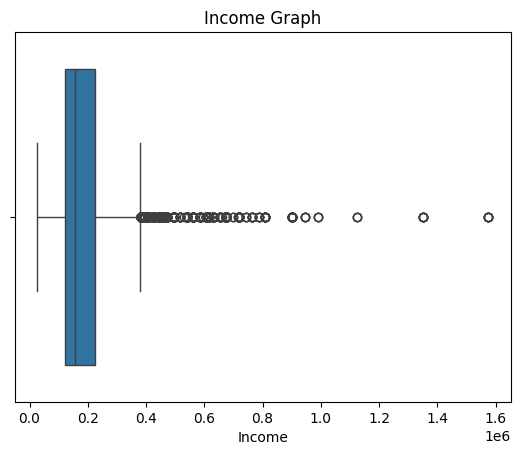

In [114]:
boxplot(X_train1,'Income')

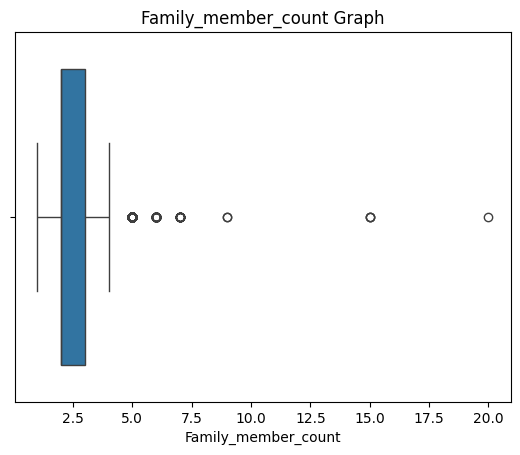

In [115]:
boxplot(X_train1,'Family_member_count')

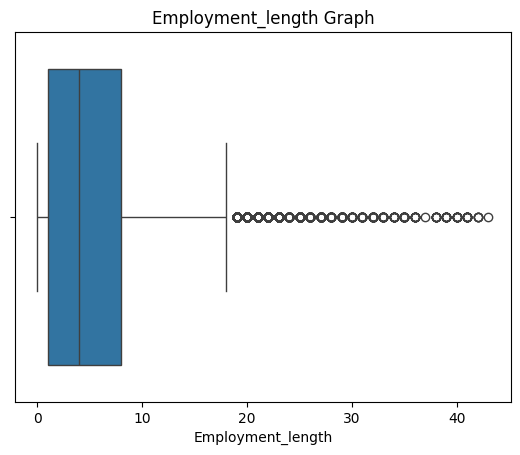

In [116]:
boxplot(X_train1,'Employment_length')

In [117]:
#X_train1['Has a phone'].value_counts()

In [118]:
def histplot(df,feature,the_bins=50):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.histplot(df[feature],bins=the_bins,kde=True)
    
    
    plt.title('{} distribution'.format(feature))
    return plt.show()

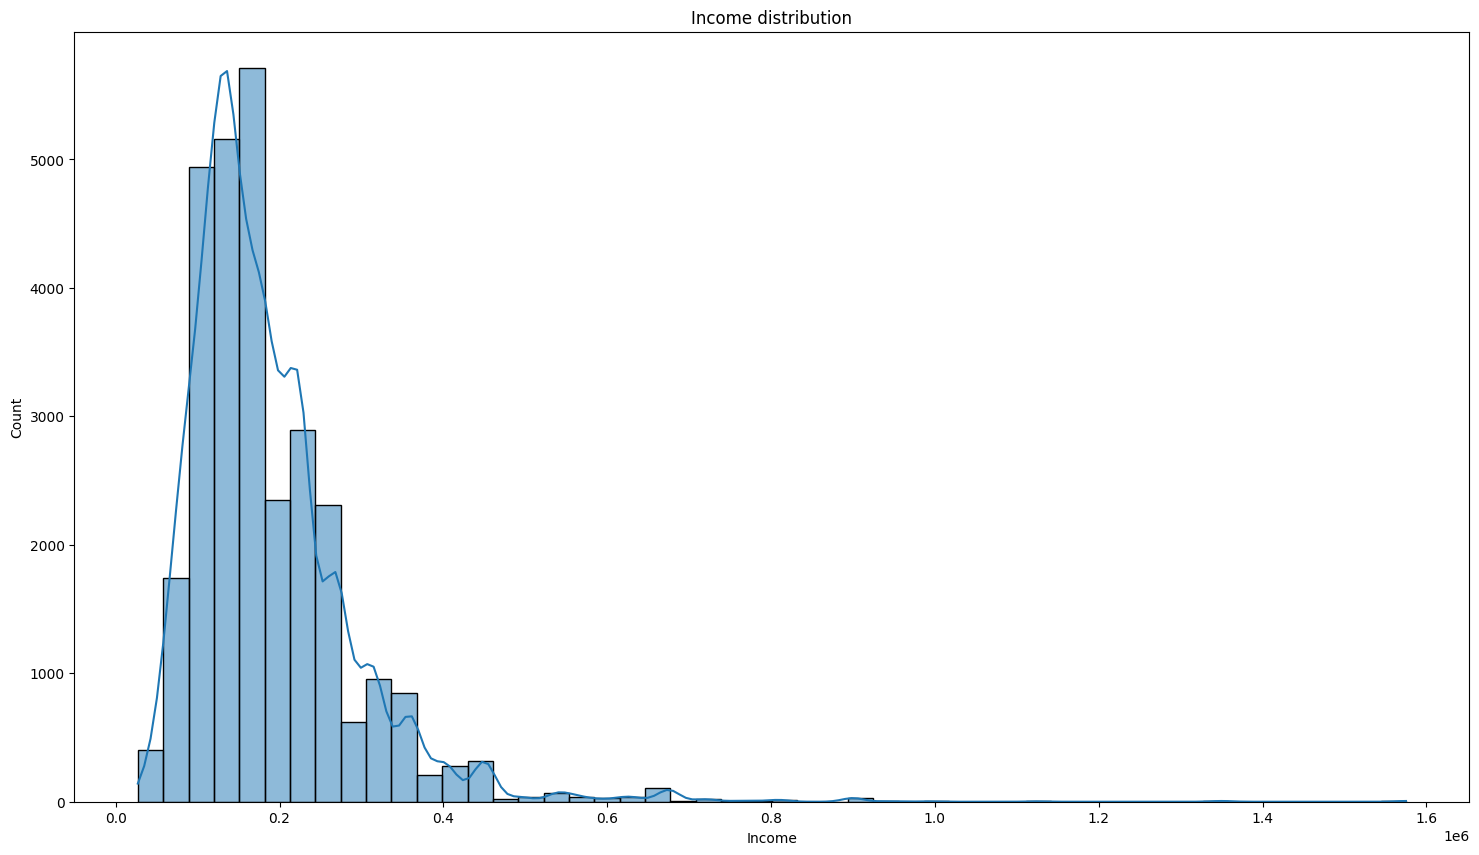

In [119]:
histplot(X_train1,'Income')

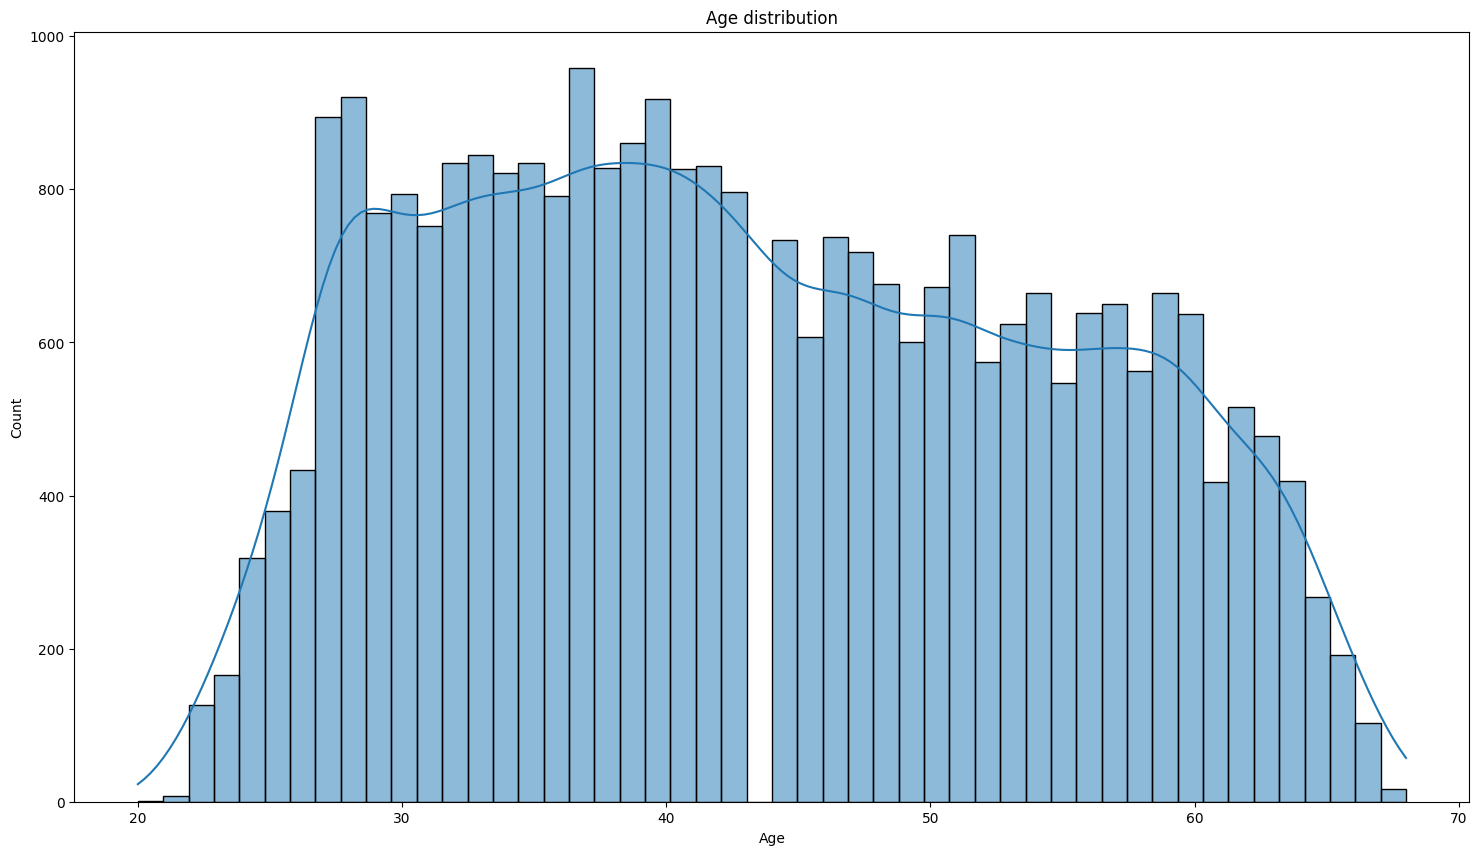

In [120]:
histplot(X_train1,'Age')

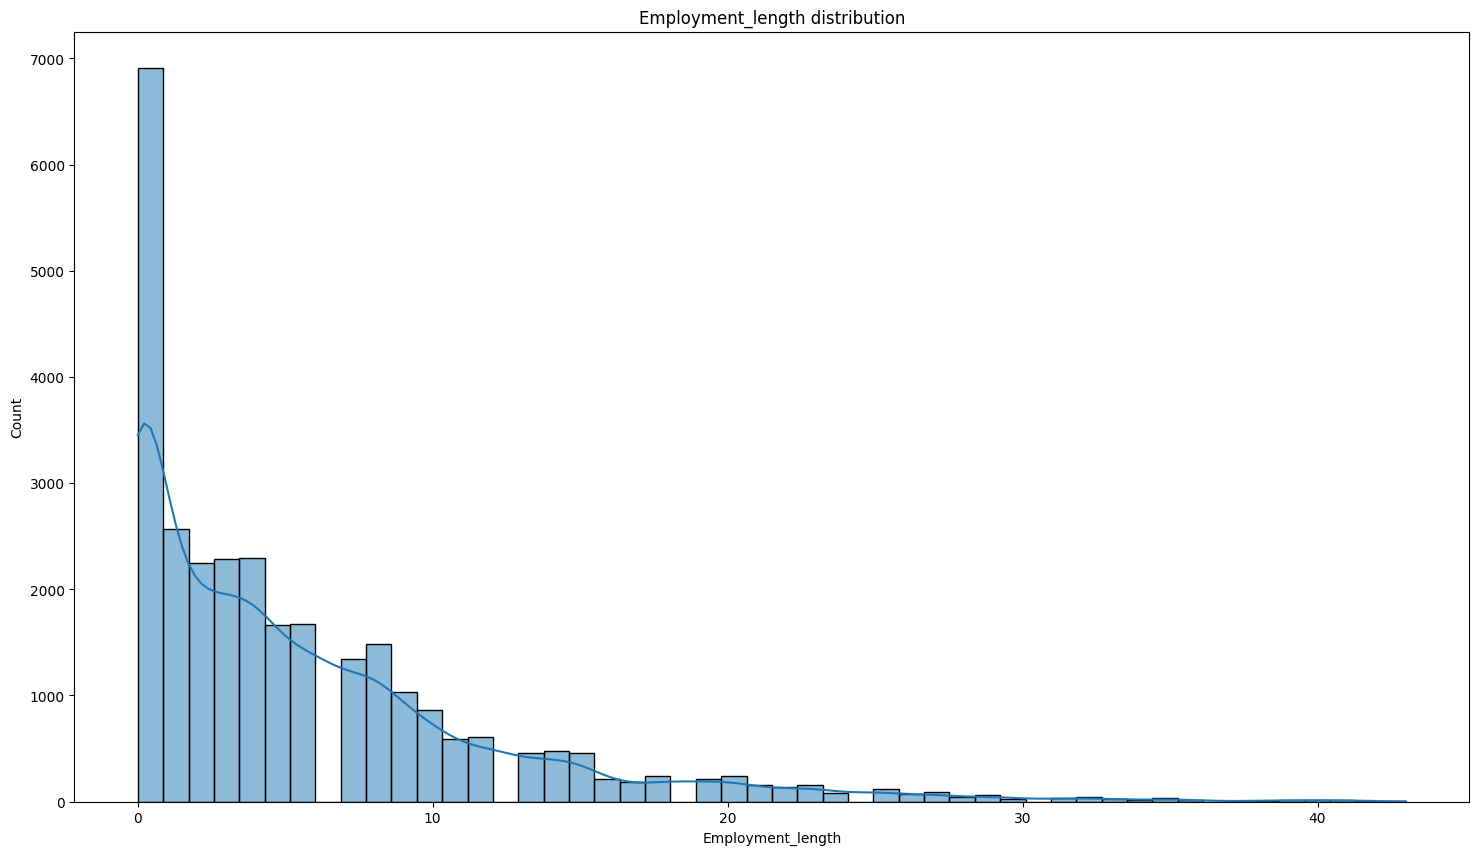

In [121]:
histplot(X_train1,'Employment_length')

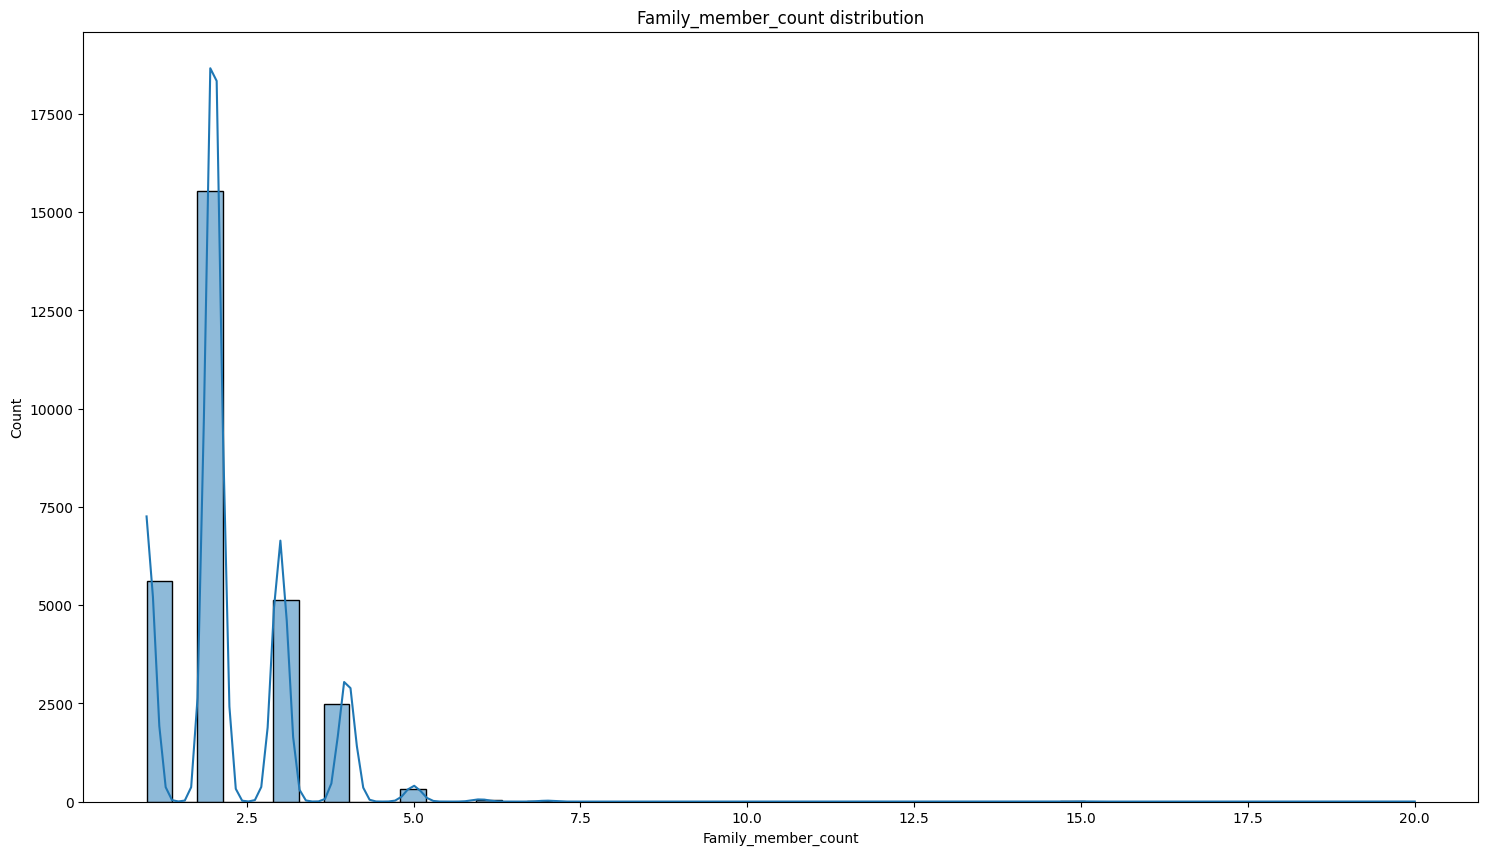

In [122]:
histplot(X_train1,'Family_member_count')

In [123]:
# remove outliers

In [124]:
X_train1[X_train1['Age']<21]

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
19226,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,112500,20,2,1


In [125]:
X_train1[X_train1['Income']<27001]

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
15671,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,27000,40,13,2
20179,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,27000,52,3,2


In [126]:
scaler=MinMaxScaler()

In [127]:
scaler.fit(X_train1[['Age','Income', 'Employment_length']])


MinMaxScaler()

In [128]:
X_train1[['Age','Income', 'Employment_length']]=scaler.transform(X_train1[['Age','Income', 'Employment_length']])

In [129]:
X_test1[['Age','Income', 'Employment_length']]=scaler.transform(X_test1[['Age','Income', 'Employment_length']])

In [130]:
data_20=X_train1[X_train1['Age']==0]

In [131]:
data_20

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
19226,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.055233,0.0,0.046512,1


In [132]:
X_train1.iloc[19224]

Gender_F                                         1.000000
Gender_M                                         0.000000
Has_a_car_N                                      1.000000
Has_a_car_Y                                      0.000000
Has_a_property_N                                 0.000000
Has_a_property_Y                                 1.000000
Employment_status_Commercial associate           1.000000
Employment_status_Pensioner                      0.000000
Employment_status_State servant                  0.000000
Employment_status_Student                        0.000000
Employment_status_Working                        0.000000
Education_level_Academic degree                  0.000000
Education_level_Higher education                 0.000000
Education_level_Incomplete higher                0.000000
Education_level_Lower secondary                  0.000000
Education_level_Secondary / secondary special    1.000000
Marital_status_Civil marriage                    0.000000
Marital_status

In [133]:
X_train1.head()

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.069767,0.916667,0.000000,2
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.156977,0.166667,0.186047,2
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.500000,0.186047,2
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.127907,0.437500,0.209302,2
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.541667,0.348837,2


In [134]:
X_test1

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.075581,0.895833,0.000000,2
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.186047,0.604167,0.186047,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.122093,0.208333,0.162791,4
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.084302,0.375000,0.232558,5
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.104651,0.354167,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.156977,0.145833,0.023256,3
7288,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.186047,0.458333,0.372093,3
7289,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.127907,0.937500,0.000000,2
7290,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.127907,0.458333,0.000000,2


In [135]:
y_test

,is high risk
17085,0
1388,0
18803,0
3686,0
15603,0
...,...
23649,0
28174,0
23253,0
17381,0


In [136]:
data_27=X_train1[X_train1['Income']==0]

In [137]:
data_27

,Gender_F,Gender_M,Has_a_car_N,Has_a_car_Y,Has_a_property_N,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
15671,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.416667,0.302326,2
20179,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.069767,2


In [138]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Gender_F                                       29165 non-null  float64
 1   Gender_M                                       29165 non-null  float64
 2   Has_a_car_N                                    29165 non-null  float64
 3   Has_a_car_Y                                    29165 non-null  float64
 4   Has_a_property_N                               29165 non-null  float64
 5   Has_a_property_Y                               29165 non-null  float64
 6   Employment_status_Commercial associate         29165 non-null  float64
 7   Employment_status_Pensioner                    29165 non-null  float64
 8   Employment_status_State servant                29165 non-null  float64
 9   Employment_status_Student                      291

In [139]:
len(y_train)

29165

In [140]:
len(X_train1)

29165

In [141]:
X_train1.drop(columns=['Gender_F','Has_a_car_N','Has_a_property_N'],inplace=True)

In [142]:
X_test1.drop(columns=['Gender_F','Has_a_car_N','Has_a_property_N'],inplace=True)

In [143]:
X_train1

,Gender_M,Has_a_car_Y,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,Employment_status_Working,Education_level_Academic degree,Education_level_Higher education,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.069767,0.916667,0.000000,2
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.156977,0.166667,0.186047,2
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.500000,0.186047,2
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.127907,0.437500,0.209302,2
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.541667,0.348837,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.069767,0.291667,0.279070,4
29161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.040698,0.145833,0.186047,1
29162,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.125000,0.229167,0.023256,2
29163,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.072674,0.625000,0.511628,2


In [144]:
testing=X_test1[24:25]

In [145]:
X_test[24:25]

,Gender,Has_a_car,Has_a_property,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Family_member_count
36150,F,N,Y,216000,Pensioner,Secondary / secondary special,Widow,House / apartment,54,0,1


In [146]:
testing_r=y_test[24:25]

In [147]:
testing

,Gender_M,Has_a_car_Y,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,Employment_status_Working,Education_level_Academic degree,Education_level_Higher education,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
24,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.122093,0.708333,0.0,1


In [148]:
testing_r

,is high risk
36150,1


In [149]:
X_train1

,Gender_M,Has_a_car_Y,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,Employment_status_Working,Education_level_Academic degree,Education_level_Higher education,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.069767,0.916667,0.000000,2
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.156977,0.166667,0.186047,2
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.500000,0.186047,2
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.127907,0.437500,0.209302,2
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.541667,0.348837,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.069767,0.291667,0.279070,4
29161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.040698,0.145833,0.186047,1
29162,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.125000,0.229167,0.023256,2
29163,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.072674,0.625000,0.511628,2


In [150]:
y_train=y_train.reset_index()


In [151]:
y_test=y_test.reset_index()

In [152]:
y_test.drop('index',axis=1,inplace=True)

In [153]:
y_train.drop('index',axis=1,inplace=True)

In [154]:
y_train

,is high risk
0,0
1,0
2,0
3,0
4,0
...,...
29160,0
29161,0
29162,0
29163,0


In [155]:
y_test

,is high risk
0,0
1,0
2,0
3,0
4,0
...,...
7287,0
7288,0
7289,0
7290,0


In [156]:
X_train1.head()

,Gender_M,Has_a_car_Y,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,Employment_status_Working,Education_level_Academic degree,Education_level_Higher education,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.069767,0.916667,0.000000,2
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.156977,0.166667,0.186047,2
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.500000,0.186047,2
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.127907,0.437500,0.209302,2
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.541667,0.348837,2


In [157]:
y_train.head()

,is high risk
0,0
1,0
2,0
3,0
4,0


In [158]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Gender_M                                       29165 non-null  float64
 1   Has_a_car_Y                                    29165 non-null  float64
 2   Has_a_property_Y                               29165 non-null  float64
 3   Employment_status_Commercial associate         29165 non-null  float64
 4   Employment_status_Pensioner                    29165 non-null  float64
 5   Employment_status_State servant                29165 non-null  float64
 6   Employment_status_Student                      29165 non-null  float64
 7   Employment_status_Working                      29165 non-null  float64
 8   Education_level_Academic degree                29165 non-null  float64
 9   Education_level_Higher education               291

In [159]:
y_train.value_counts()

is high risk
0               28672
1                 493
Name: count, dtype: int64

In [160]:
len(y_train)

29165

In [161]:
len(X_train1)

29165

In [162]:
# over sampling

In [163]:
smote = SMOTE(random_state=42,sampling_strategy='minority')
X_train1,y_train = smote.fit_resample(X_train1, y_train)

In [164]:
#under=RandomUnderSampler()
#X_train1,y_train=under.fit_resample(X_train1,y_train)

In [165]:
#over=RandomOverSampler()
#X_train1,y_train=over.fit_resample(X_train1,y_train)

In [166]:
X_train1

,Gender_M,Has_a_car_Y,Has_a_property_Y,Employment_status_Commercial associate,Employment_status_Pensioner,Employment_status_State servant,Employment_status_Student,Employment_status_Working,Education_level_Academic degree,Education_level_Higher education,...,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents,Income,Age,Employment_length,Family_member_count
0,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.069767,0.916667,0.000000,2
1,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.156977,0.166667,0.186047,2
2,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.500000,0.186047,2
3,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.127907,0.437500,0.209302,2
4,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.098837,0.541667,0.348837,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57339,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.127907,0.348760,0.215338,4
57340,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.150786,0.365744,0.090005,2
57341,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.052326,0.833333,0.000000,1
57342,1.0,0.337379,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.157370,0.180218,0.054075,3


In [167]:
y_train

,is high risk
0,0
1,0
2,0
3,0
4,0
...,...
57339,1
57340,1
57341,1
57342,1


In [168]:
y_train=np.ravel(y_train)

In [169]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
algos=Pipeline(steps=[
    ('logisticRegression',LogisticRegression(random_state=42,class_weight='balanced')),
    ('Randomforest',RandomForestClassifier(random_state=42)),
    ('decisionTree',DecisionTreeClassifier()),
    ('svc',SVC())
    
    
])

In [170]:
from sklearn.metrics import accuracy_score

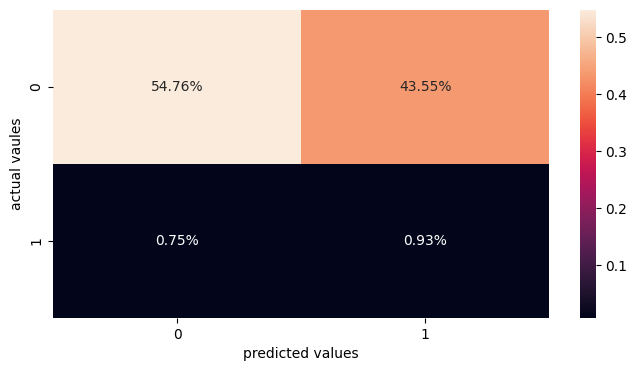

              precision    recall  f1-score   support

           0       0.99      0.56      0.71      7169
           1       0.02      0.55      0.04       123

    accuracy                           0.56      7292
   macro avg       0.50      0.55      0.38      7292
weighted avg       0.97      0.56      0.70      7292

************************************************************


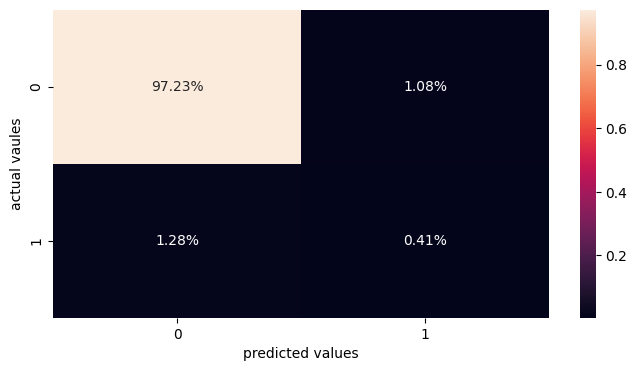

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7169
           1       0.28      0.24      0.26       123

    accuracy                           0.98      7292
   macro avg       0.63      0.62      0.62      7292
weighted avg       0.98      0.98      0.98      7292

************************************************************


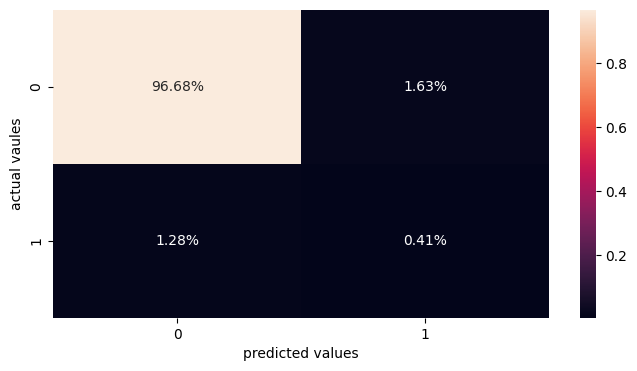

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7169
           1       0.20      0.24      0.22       123

    accuracy                           0.97      7292
   macro avg       0.59      0.61      0.60      7292
weighted avg       0.97      0.97      0.97      7292

************************************************************


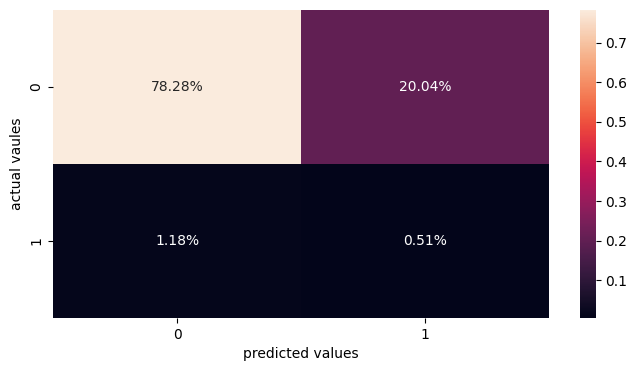

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      7169
           1       0.02      0.30      0.05       123

    accuracy                           0.79      7292
   macro avg       0.50      0.55      0.46      7292
weighted avg       0.97      0.79      0.87      7292

************************************************************


In [171]:
for model in algos:
    model.fit(X_train1,y_train)
    
    y_pred=model.predict(X_test1)
   
    cf_matrix=confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%' ,annot=True)
    plt.xlabel('predicted values')
    plt.ylabel('actual vaules')
    plt.show()
    print(classification_report(y_test, y_pred))
    print('*'*60)
    

In [172]:
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train1,y_train)
ypred=rf_clf.predict(X_test1)
ypred_prob=rf_clf.predict_proba(X_test1)[:,1]
threshold=0.1
ypred_adj=(ypred_prob>=threshold).astype(int)
print(classification_report(y_test,ypred_adj))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7169
           1       0.12      0.51      0.19       123

    accuracy                           0.93      7292
   macro avg       0.56      0.72      0.58      7292
weighted avg       0.98      0.93      0.95      7292



In [173]:
joblib.dump(encoder, 'encoder.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(rf_clf, 'model.joblib')

['model.joblib']